# Visualization Examples Using matplotlib

In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Dataset is from an experimental study measuring bird seed consumption as a function of Color of feeder (yellow vs. green) and amount of tree Cover (less vs. more). Color was the independent variable and Cover was the mediator variable.

A calibration curve was created in order to convert the consumption in centimeters to weight in grams.

Rate of consumption was computed by dividing Converation by DurationHours, and Rate served as the dependent variable. 

In [2]:
#Import dataset

df_birds=pd.read_csv('https://raw.githubusercontent.com/jshutay/Conservation/master/BirdStudyData.csv')
df_birds.head()

,Sample,DurationHours,Consumption,Color,Cover,Valid,Rate,TimeofDay,Conversion
0,1,12.5,21.3,Green,Yes,0,110.678,Evening,1383.4718
1,2,12.5,12.1,Green,No,0,55.554,Evening,694.4286
2,3,12.5,26.7,Green,Yes,0,143.033,Evening,1787.9102
3,4,7.0,22.6,Green,No,1,211.548,Afternoon,1480.8366
4,5,3.0,11.1,Green,Yes,1,206.511,Morning,619.5326


The code chunks to follow provide examples of various visualizations using matplotlib:

The first task is to examine aggregations of the data to determine trends in average rate of consumption. The next three blocks of code examine trends in mean consumption rate.  

In [3]:
table = pd.pivot_table(data=df_birds,index='Color',values='Rate',aggfunc=np.mean)
table

,Rate
Color,
Green,302.599087
Yellow,305.259435


In [4]:
table2 = pd.pivot_table(data=df_birds,index='Cover',values='Rate',aggfunc=np.mean)
table2

,Rate
Cover,
No,333.883957
Yes,273.974565


In [5]:
table3 = pd.pivot_table(data=df_birds,index='TimeofDay',values='Rate',aggfunc=np.mean)
table3

,Rate
TimeofDay,
Afternoon,333.812900
Evening,244.703071
Morning,328.035182


The next chunk of code creates a bar chart based on the newly created table

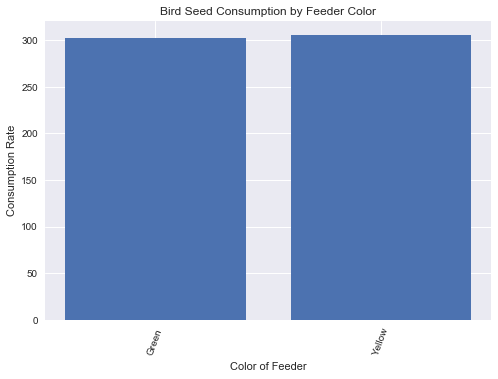

In [6]:
#bar graph
plt.bar(table.index,table['Rate'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Color of Feeder') 

#y-axis labels 
plt.ylabel('Consumption Rate') 

#plot title 
plt.title('Bird Seed Consumption by Feeder Color') 

#save plot 
plt.savefig('/Users/jshutay/Downloads/BirdFeederChart.png',dpi=300,bbox_inches='tight') 


The next block of code shows the consumption rate based on daypart.

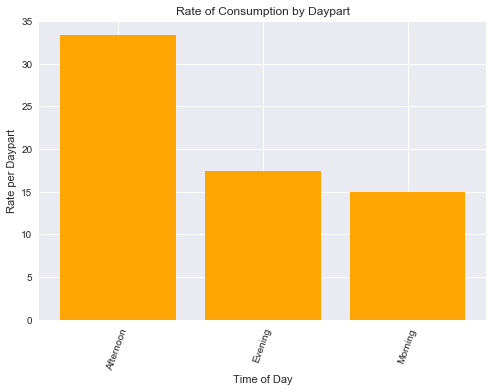

In [9]:
#dictionary for rate consumed by unique samples
item_count = {}

for i in range(table3.index.nunique()):
    item_count[table3.index[i]] = table3.Rate[i]/df_birds[df_birds['TimeofDay']==table3.index[i]].shape[0]

#bar plot 
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Time of Day')

#label y-axis
plt.ylabel('Rate per Daypart')

#label the plot
plt.title('Rate of Consumption by Daypart')

#save plot
plt.savefig('/Users/jshutay/Downloads/BirdFeederChart2.png',dpi=300,bbox_inches='tight')


Creating a Pie Chart - This code does not work, still trying to troubleshoot.

In [10]:
#dictionary for Color and its total rate of consumption
d_Color = {}

#total Rate of consumption
total = df_birds['Rate'].sum()

#find ratio of rate of consumption per Color
for i in range(df_birds['Color'].nunique()):
    c = df_birds['Color'].unique()[i]

#Total Rate of consumption by Color
c_Rate = df_birds[df_birds['Color']==c]['Rate'].sum()
d_Color[c] = c_Rate/total

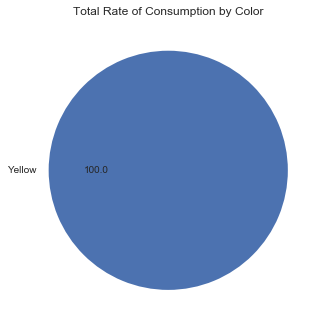

In [18]:
#pie plot
plt.pie([x*100 for x in d_Color.values()],labels=[x for x in d_Color.keys()],autopct='%0.1f',explode=[0,0.1])

#label the plot
plt.title('Total Rate of Consumption by Color')
plt.savefig('/Users/jshutay/Downloads/BirdFeederChart3.png',dpi=300,bbox_inches='tight')

Creating Box Plots

In [20]:
#dictionary for Rate per Cover
c_rate = {}
for i in df_birds['Cover'].unique():
    c_rate[i] = df_birds[df_birds['Cover']==i].Rate

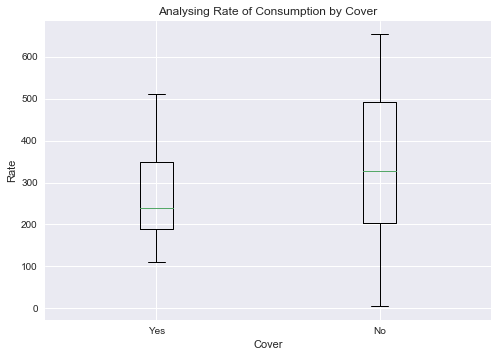

In [21]:
#plotting boxplot
plt.boxplot([x for x in c_rate.values()],labels=[x for x in c_rate.keys()])

#x and y-axis labels
plt.xlabel('Cover')
plt.ylabel('Rate')

#plot title
plt.title('Analysing Rate of Consumption by Cover')

#save and display
plt.savefig('/Users/jshutay/Downloads/BirdFeederChart4.png',dpi=300,bbox_inches='tight')

Creating Histograms

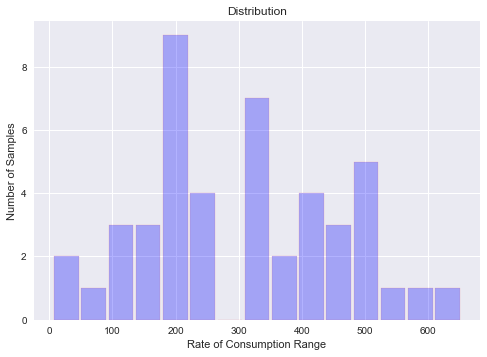

In [22]:
#plotting histogram
plt.hist(df_birds['Rate'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red')

#x and y-axis labels
plt.xlabel('Rate of Consumption Range')
plt.ylabel('Number of Samples')

#plot title
plt.title('Distribution')

#save and display the plot
plt.savefig('/Users/jshutay/Downloads/BirdFeederChart5.png',dpi=300,bbox_inches='tight')
plt.show();

Line Plot and Subplots

In [23]:
#new average consumption column
df_birds['AvgConsumption'] = df_birds.apply(lambda x: x.Consumption/x.DurationHours,axis=1)

#list to store month-wise revenue
time=[]
time_order=[]

for i in range(max(df_birds['Sample'])):
    time.append(i)
    time_order.append(df_birds[df_birds['Sample']==i].AvgConsumption.sum())
    
#list to store week-wise revenue
#week=[]
#week_order=[]
#for i in range(max(df['week'])):
#    week.append(i)
#    week_order.append(df[df['week']==i].revenue.sum())

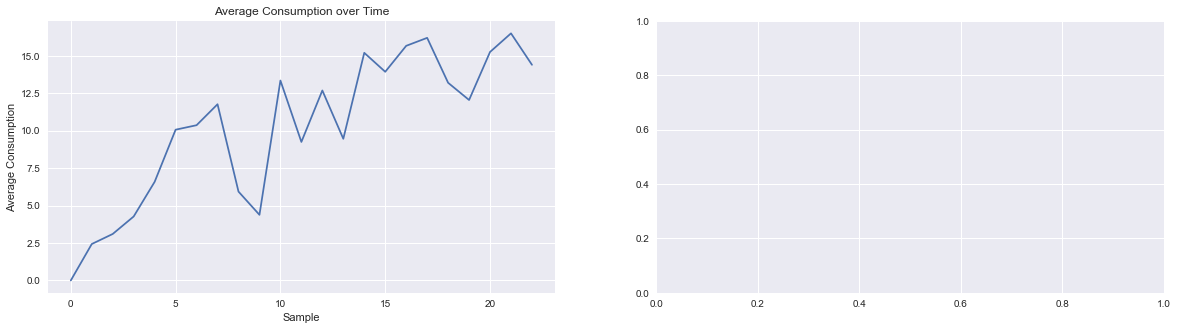

In [24]:
#subplots returns a Figure and an Axes object
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))

#manipulating the first Axes
ax[0].plot(time,time_order)
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Average Consumption')
ax[0].set_title('Average Consumption over Time')

#manipulating the second Axes
#ax[1].plot(month,month_order)
#ax[1].set_xlabel('Month')
#ax[1].set_ylabel('Revenue')
#ax[1].set_title('Monthly income')

#save and display the plot
plt.savefig('/Users/jshutay/Downloads/BirdFeederChart6.png',dpi=300,bbox_inches='tight')


Other Stuff

In [ ]:
daypart_name = ['Morning','Afternoon','Evening']

#relation between time of day and rate of consumption
hours_table=pd.pivot_table(df_birds,index='DurationHours',values='Rate',aggfunc=np.sum)

#relation between center type and op area
daypart_type = {}
for i in daypart_name:
    daypart_type[i] = df_birds[df_birds['TimeofDay']==i].TimeofDay

#relation between center type and num of orders
daypart_table=pd.pivot_table(df_birds,index='TimeofDay',values='Rate',aggfunc=np.sum)

#subplots
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,12))

#scatter plots
ax[0].scatter(hours_table.index,hours_table['Rate'],color='pink')
ax[0].set_xlabel('Number of Hours')
ax[0].set_ylabel('Rate of Consumption')
ax[0].set_title('Does number of hours affect rate of consumption')
#ax[0].annotate('optimum number of hours of 4 km^2',xy=(4.2,1.1*10**7),xytext=(7,1.1*10**7),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12)

#boxplot
ax[1].boxplot([x for x in daypart_type.values()], labels=[x for x in daypart_type.keys()])
ax[1].set_xlabel('Daypart')
ax[1].set_ylabel('Number of Hours')
ax[1].set_title('Which daypart had the highest consumption rate?')

#bar graph
ax[2].bar(center_table.index,daypart_table['Rate'],alpha=0.7,color='orange',width=0.5)
ax[2].set_xlabel('Daypart')
ax[2].set_ylabel('Rate')
ax[2].set_title('Rate per Daypart')

#show figure
plt.tight_layout()
plt.savefig('/Users/jshutay/Downloads/BirdFeederChart7.png',dpi=300,bbox_inches='tight')